In [1]:
# import pickle
import jax
import jax.numpy as jnp
import torch

In [2]:
# url = "./edm-cifar10-32x32-uncond-vp.pkl"
url = "../../model.ckpt"

with open(url, "rb") as f:
    # net = pickle.load(f)
    net = torch.load(f, map_location=torch.device('cpu'))

In [4]:
# net.keys()
# net['ema'].parameters()
# net.keys()
net.keys()
type(net["state_dict"])

collections.OrderedDict

In [5]:
for model_key in net["state_dict"].keys():
    print(model_key)

encoder.conv_in.weight
encoder.conv_in.bias
encoder.down_blocks.0.resnets.0.norm1.weight
encoder.down_blocks.0.resnets.0.norm1.bias
encoder.down_blocks.0.resnets.0.conv1.weight
encoder.down_blocks.0.resnets.0.conv1.bias
encoder.down_blocks.0.resnets.0.norm2.weight
encoder.down_blocks.0.resnets.0.norm2.bias
encoder.down_blocks.0.resnets.0.conv2.weight
encoder.down_blocks.0.resnets.0.conv2.bias
encoder.down_blocks.0.resnets.1.norm1.weight
encoder.down_blocks.0.resnets.1.norm1.bias
encoder.down_blocks.0.resnets.1.conv1.weight
encoder.down_blocks.0.resnets.1.conv1.bias
encoder.down_blocks.0.resnets.1.norm2.weight
encoder.down_blocks.0.resnets.1.norm2.bias
encoder.down_blocks.0.resnets.1.conv2.weight
encoder.down_blocks.0.resnets.1.conv2.bias
encoder.down_blocks.0.downsamplers.0.conv.weight
encoder.down_blocks.0.downsamplers.0.conv.bias
encoder.down_blocks.1.resnets.0.norm1.weight
encoder.down_blocks.1.resnets.0.norm1.bias
encoder.down_blocks.1.resnets.0.conv1.weight
encoder.down_blocks.1.r

In [26]:
from collections import OrderedDict

def change_key_from_state_dict(state_dict, old_key, new_key):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        splitted_k = k.split(".")
        new_splitted_k = []
        for i in range(len(splitted_k)):
            if splitted_k[i] == old_key:
                if new_key == "":
                    continue
                new_splitted_k.append(new_key)
            else:
                new_splitted_k.append(splitted_k[i])
        new_k = ".".join(new_splitted_k)
        new_state_dict[new_k] = v
    return new_state_dict

def change_key_before_trigger_key_from_state_dict(state_dict, before_trigger_key, old_key, new_key):
    new_state_dict = OrderedDict()
    before_trigger_key = before_trigger_key.split(".")
    for k, v in state_dict.items():
        splitted_k = k.split(".")
        new_splitted_k = []
        for i in range(len(splitted_k)):
            if splitted_k[i] == old_key and splitted_k[i - len(before_trigger_key) :i] == before_trigger_key:
                if new_key == "":
                    continue
                new_splitted_k.append(new_key)
            else:
                new_splitted_k.append(splitted_k[i])
        new_k = ".".join(new_splitted_k)
        new_state_dict[new_k] = v
    return new_state_dict

def change_whole_key(state_dict, old_key, new_key):
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if old_key in k:
            k = k.replace(old_key, new_key)
        new_state_dict[k] = v
    return new_state_dict

In [34]:
new_state_dict = change_key_from_state_dict(net["state_dict"], "down_blocks", "down")
new_state_dict = change_key_from_state_dict(new_state_dict, "up_blocks", "up")
new_state_dict = change_key_from_state_dict(new_state_dict, "mid_block", "mid")
new_state_dict = change_key_from_state_dict(new_state_dict, "resnets", "block")
new_state_dict = change_key_from_state_dict(new_state_dict, "downsamplers", "downsample")
new_state_dict = change_key_from_state_dict(new_state_dict, "upsamplers", "upsample")
new_state_dict = change_key_from_state_dict(new_state_dict, "conv_norm_out", "norm_out")
new_state_dict = change_key_from_state_dict(new_state_dict, "conv_shortcut", "nin_shortcut") ## Warning
new_state_dict = change_key_from_state_dict(new_state_dict, "attentions", "attn_1") 
new_state_dict = change_key_from_state_dict(new_state_dict, "to_q", "q") 
new_state_dict = change_key_from_state_dict(new_state_dict, "to_k", "k") 
new_state_dict = change_key_from_state_dict(new_state_dict, "to_v", "v") 
new_state_dict = change_key_from_state_dict(new_state_dict, "to_out", "proj_out") 
new_state_dict = change_key_from_state_dict(new_state_dict, "group_norm", "norm") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "downsample", "0", "") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "encoder.mid.attn_1", "0", "") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "encoder.mid.attn_1.proj_out", "0", "") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "0.upsample", "0", "") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "decoder.mid.attn_1", "0", "") 
new_state_dict = change_key_before_trigger_key_from_state_dict(new_state_dict, "encoder.mid.attn_1.proj_out", "0", "") 
new_state_dict = change_whole_key(new_state_dict, "decoder.mid.attn_1.0", "decoder.mid.attn_1") 
new_state_dict = change_whole_key(new_state_dict, "decoder.mid.block.0", "decoder.mid.block_1") 
new_state_dict = change_whole_key(new_state_dict, "decoder.mid.block.1", "decoder.mid.block_2") 
new_state_dict = change_whole_key(new_state_dict, "encoder.mid.block.0", "encoder.mid.block_1") 
new_state_dict = change_whole_key(new_state_dict, "encoder.mid.block.1", "encoder.mid.block_2") 


In [35]:
for model_key in new_state_dict.keys():
    print(model_key)

encoder.conv_in.weight
encoder.conv_in.bias
encoder.down.0.block.0.norm1.weight
encoder.down.0.block.0.norm1.bias
encoder.down.0.block.0.conv1.weight
encoder.down.0.block.0.conv1.bias
encoder.down.0.block.0.norm2.weight
encoder.down.0.block.0.norm2.bias
encoder.down.0.block.0.conv2.weight
encoder.down.0.block.0.conv2.bias
encoder.down.0.block.1.norm1.weight
encoder.down.0.block.1.norm1.bias
encoder.down.0.block.1.conv1.weight
encoder.down.0.block.1.conv1.bias
encoder.down.0.block.1.norm2.weight
encoder.down.0.block.1.norm2.bias
encoder.down.0.block.1.conv2.weight
encoder.down.0.block.1.conv2.bias
encoder.down.0.downsample.conv.weight
encoder.down.0.downsample.conv.bias
encoder.down.1.block.0.norm1.weight
encoder.down.1.block.0.norm1.bias
encoder.down.1.block.0.conv1.weight
encoder.down.1.block.0.conv1.bias
encoder.down.1.block.0.norm2.weight
encoder.down.1.block.0.norm2.bias
encoder.down.1.block.0.conv2.weight
encoder.down.1.block.0.conv2.bias
encoder.down.1.block.0.nin_shortcut.weight

In [9]:
import sys
sys.path.append("..")
from framework.autoencoder.autoencoder import AutoEncoder
# from diffusion_new.diffusion.model.autoencoder.autoencoder import AutoEncoderVQ
from model.autoencoder.torch.autoencoder import VQModelInterface, VQModel

2024-01-24 23:46:08.527458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
ddconfig: dict
lossconfig: dict
n_embed: int
embed_dim: int

param_dict = {
    "embed_dim": 3,
    "n_embed": 8192,

    "ddconfig": {
        "double_z": False,
        "z_channels": 3,
        "resolution": 256,
        "in_channels": 3,
        "out_ch": 3,
        "ch": 128,
        "ch_mult": [1, 2, 4],
        "num_res_blocks": 2,
        "attn_resolutions": [],
        "dropout": 0.0,
    },
    "lossconfig":{}
}


In [11]:
# image_channels: int = 3
# n_channels: int = 128
# ch_mults: Union[Tuple[int, ...], List[int]] = (1, 2, 4)
# is_atten: Union[Tuple[bool, ...], List[bool]] = (False, False, False)
# n_blocks: int = 2
# dropout_rate: float = 0.1
# n_heads: int = 1
# n_groups: int = 8
# embed_dim: int = 3
# n_embed: int = 8192

flax_ae = VQModelInterface(**param_dict)

In [12]:
rng = jax.random.PRNGKey(0)
rng, key = jax.random.split(rng)
x = jax.random.normal(key, (1, 256, 256, 3))
train = False
result = flax_ae.init(rng, x=x, train=train, method=flax_ae.init_apply)

making attention of type 'vanilla' with 512 in_channels
Working with z of shape [ 1 64 64  3] = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


In [13]:
params = result["params"]
params.keys()
flax_model_key = []

In [14]:
def visualize_nested_dict_serialized(dictionary, parent_keys="", separator="."):
    for key, value in dictionary.items():
        current_key = f"{parent_keys}{key}"
        # print(current_key)
        if type(dictionary[key]) is not dict:
            print(current_key)
            flax_model_key.append(current_key)
        if isinstance(value, dict):
            visualize_nested_dict_serialized(value, f"{current_key}{separator}", separator)


In [15]:
visualize_nested_dict_serialized(params)

encoder.conv_in.kernel
encoder.conv_in.bias
encoder.down_0.block_0.norm1.scale
encoder.down_0.block_0.norm1.bias
encoder.down_0.block_0.conv1.kernel
encoder.down_0.block_0.conv1.bias
encoder.down_0.block_0.norm2.scale
encoder.down_0.block_0.norm2.bias
encoder.down_0.block_0.conv2.kernel
encoder.down_0.block_0.conv2.bias
encoder.down_0.block_1.norm1.scale
encoder.down_0.block_1.norm1.bias
encoder.down_0.block_1.conv1.kernel
encoder.down_0.block_1.conv1.bias
encoder.down_0.block_1.norm2.scale
encoder.down_0.block_1.norm2.bias
encoder.down_0.block_1.conv2.kernel
encoder.down_0.block_1.conv2.bias
encoder.down_0.downsample.conv.kernel
encoder.down_0.downsample.conv.bias
encoder.down_1.block_0.norm1.scale
encoder.down_1.block_0.norm1.bias
encoder.down_1.block_0.conv1.kernel
encoder.down_1.block_0.conv1.bias
encoder.down_1.block_0.norm2.scale
encoder.down_1.block_0.norm2.bias
encoder.down_1.block_0.conv2.kernel
encoder.down_1.block_0.conv2.bias
encoder.down_1.block_0.nin_shortcut.kernel
encod

In [16]:
from flax.traverse_util import flatten_dict, unflatten_dict

def pytorch_keys_to_flax_keys(pytorch_state_dict):
  """
    Input: pytorch state_dict
      The keys of pytorch state_dict consists of 
        `first_stage_model.encoder.conv_in.weight`, for example.
    
    Output: flax frozen_dict
      The keys are converted to
        `['first_stage_model']['encoder']['conv_in']['kernel'] (all `weight` is converted to `kernel`.)
      Values will be the same, except for some transposes.

    Weight of convolutional layers
      pytorch: [out_channel, in_channel, kernel_h, kernel_w]
      flax: [kernel_h, kernel_w, in_channel, out_channel]
  """
  flax_tree = {}
  for tup in pytorch_state_dict:
    print(tup)
    flax_key_flatten = tuple(tup.split("."))
    if "weight" in flax_key_flatten[-1]:
      if "norm" in flax_key_flatten[-2]:
        flax_key_flatten = flax_key_flatten[:-1] + ("scale",)
      # elif "conv" in flax_key_flatten[-2]:
      elif "embedding" in flax_key_flatten[-2]:
        flax_key_flatten = flax_key_flatten[:-1] + ("embedding",)
      else:
        flax_key_flatten = flax_key_flatten[:-1] + ("kernel",)
    
    try:
      if flax_key_flatten[3] == "block":
        # pass
        num_key = flax_key_flatten[4]
        flax_key_flatten = flax_key_flatten[:3] + (f"block_{num_key}", ) + flax_key_flatten[5:]
      if flax_key_flatten[1] in ["up", "down"]:
        # pass
        num_key = flax_key_flatten[2]
        flax_key_flatten = flax_key_flatten[:1] + (f"{flax_key_flatten[1]}_{num_key}", ) + flax_key_flatten[3:]
    except:
      pass
    
    flax_value = jnp.array(pytorch_state_dict[tup])
    flax_tree[flax_key_flatten] = flax_value
    print(flax_key_flatten)
  
  flax_tree_unflattened = unflatten_dict(flax_tree)
  return flax_tree_unflattened

In [36]:
# flax_dict = pytorch_keys_to_flax_keys(net["state_dict"])
flax_dict = pytorch_keys_to_flax_keys(new_state_dict)
flax_dict_flattened = flatten_dict(flax_dict)

encoder.conv_in.weight
('encoder', 'conv_in', 'kernel')
encoder.conv_in.bias
('encoder', 'conv_in', 'bias')
encoder.down.0.block.0.norm1.weight
('encoder', 'down_0', 'block_0', 'norm1', 'scale')
encoder.down.0.block.0.norm1.bias
('encoder', 'down_0', 'block_0', 'norm1', 'bias')
encoder.down.0.block.0.conv1.weight
('encoder', 'down_0', 'block_0', 'conv1', 'kernel')
encoder.down.0.block.0.conv1.bias
('encoder', 'down_0', 'block_0', 'conv1', 'bias')
encoder.down.0.block.0.norm2.weight
('encoder', 'down_0', 'block_0', 'norm2', 'scale')
encoder.down.0.block.0.norm2.bias
('encoder', 'down_0', 'block_0', 'norm2', 'bias')
encoder.down.0.block.0.conv2.weight
('encoder', 'down_0', 'block_0', 'conv2', 'kernel')
encoder.down.0.block.0.conv2.bias
('encoder', 'down_0', 'block_0', 'conv2', 'bias')
encoder.down.0.block.1.norm1.weight
('encoder', 'down_0', 'block_1', 'norm1', 'scale')
encoder.down.0.block.1.norm1.bias
('encoder', 'down_0', 'block_1', 'norm1', 'bias')
encoder.down.0.block.1.conv1.weight

In [18]:
print(flax_dict_flattened.keys())

dict_keys([('encoder', 'conv_in', 'kernel'), ('encoder', 'conv_in', 'bias'), ('encoder', 'down_0', 'block_0', 'norm1', 'scale'), ('encoder', 'down_0', 'block_0', 'norm1', 'bias'), ('encoder', 'down_0', 'block_0', 'conv1', 'kernel'), ('encoder', 'down_0', 'block_0', 'conv1', 'bias'), ('encoder', 'down_0', 'block_0', 'norm2', 'scale'), ('encoder', 'down_0', 'block_0', 'norm2', 'bias'), ('encoder', 'down_0', 'block_0', 'conv2', 'kernel'), ('encoder', 'down_0', 'block_0', 'conv2', 'bias'), ('encoder', 'down_0', 'block_1', 'norm1', 'scale'), ('encoder', 'down_0', 'block_1', 'norm1', 'bias'), ('encoder', 'down_0', 'block_1', 'conv1', 'kernel'), ('encoder', 'down_0', 'block_1', 'conv1', 'bias'), ('encoder', 'down_0', 'block_1', 'norm2', 'scale'), ('encoder', 'down_0', 'block_1', 'norm2', 'bias'), ('encoder', 'down_0', 'block_1', 'conv2', 'kernel'), ('encoder', 'down_0', 'block_1', 'conv2', 'bias'), ('encoder', 'down_0', 'downsample', 'conv', 'kernel'), ('encoder', 'down_0', 'downsample', 'con

In [39]:
from flax.core import unfreeze, freeze
from flax.jax_utils import unreplicate

# params= unreplicate(diffusion_framework.framework.model_state)
# params 
# params_unfreeze = unfreeze(flatten_dict(params.params))
params_unfreeze = unfreeze(flatten_dict(params))
# non_changing_els = ["map_layer0", "map_layer1", "map_augment"]
total_weight = list(flax_dict_flattened.keys())

param_keys = list(params_unfreeze.keys())

for k, v in params_unfreeze.items():
  # print(k)
  # input()
  k_ = tuple()
  
  for el in k:
    if el == "UNetpp_0":
      continue
    # elif el == "atten":
      # continue
    # elif 'enc' in el or 'dec' in el:
    #   tmp_el = el.split("_")
    #   el = (tmp_el[0], "_".join(tmp_el[1:]),)
    # elif el not in non_changing_els:
    #   el = tuple(el.split("_"))
    else:
      el = (el,)

    # if el == ("kernel",) or el == ("scale",):
    #   k_ += ("weight",)
    # else:
    k_ += el

  if k_ in flax_dict_flattened.keys():
    pytorch_dict_value = flax_dict_flattened[k_]
    if len(v.shape) == 4:
      try:
        pytorch_dict_value_transposed = jnp.transpose(pytorch_dict_value, (2, 3, 1, 0))
      except:
        print(k_)
        print(pytorch_dict_value.shape)
        print(v.shape)
      assert v.shape == pytorch_dict_value_transposed.shape
      params_unfreeze[k] = pytorch_dict_value_transposed
      # print("transferred", flush=True)
    elif len(v.shape) == 1:
      assert v.shape == pytorch_dict_value.shape
      params_unfreeze[k] = pytorch_dict_value
      # print("transferred", flush=True)
    elif len(v.shape) == 2:
      pytorch_dict_value_transposed = jnp.transpose(pytorch_dict_value, (1, 0))
      if v.shape != pytorch_dict_value_transposed.shape:
        pytorch_dict_value_transposed = pytorch_dict_value
      assert v.shape == pytorch_dict_value_transposed.shape
      params_unfreeze[k] = pytorch_dict_value_transposed
    else:
      print(v.shape)
      raise ValueError("Exist?")
    print(f"{'.'.join(k_)} transferred.")
    total_weight.remove(k_)
    param_keys.remove(k_)
  else:
    print()
    raise ValueError(f"{'.'.join(k_)} is not existed in pytorch model")

print(f"{total_weight} of weights remained.")
print("Done")

encoder.conv_in.kernel transferred.
encoder.conv_in.bias transferred.
encoder.down_0.block_0.norm1.scale transferred.
encoder.down_0.block_0.norm1.bias transferred.
encoder.down_0.block_0.conv1.kernel transferred.
encoder.down_0.block_0.conv1.bias transferred.
encoder.down_0.block_0.norm2.scale transferred.
encoder.down_0.block_0.norm2.bias transferred.
encoder.down_0.block_0.conv2.kernel transferred.
encoder.down_0.block_0.conv2.bias transferred.
encoder.down_0.block_1.norm1.scale transferred.
encoder.down_0.block_1.norm1.bias transferred.
encoder.down_0.block_1.conv1.kernel transferred.
encoder.down_0.block_1.conv1.bias transferred.
encoder.down_0.block_1.norm2.scale transferred.
encoder.down_0.block_1.norm2.bias transferred.
encoder.down_0.block_1.conv2.kernel transferred.
encoder.down_0.block_1.conv2.bias transferred.
encoder.down_0.downsample.conv.kernel transferred.
encoder.down_0.downsample.conv.bias transferred.
encoder.down_1.block_0.norm1.scale transferred.
encoder.down_1.blo

AssertionError: 

In [33]:
# params_unfreeze[]
print(total_weight)

[('encoder', 'mid', 'attn_1', 'norm', 'scale'), ('encoder', 'mid', 'attn_1', 'norm', 'bias'), ('encoder', 'mid', 'attn_1', 'q', 'kernel'), ('encoder', 'mid', 'attn_1', 'q', 'bias'), ('encoder', 'mid', 'attn_1', 'k', 'kernel'), ('encoder', 'mid', 'attn_1', 'k', 'bias'), ('encoder', 'mid', 'attn_1', 'v', 'kernel'), ('encoder', 'mid', 'attn_1', 'v', 'bias'), ('encoder', 'mid', 'attn_1', 'proj_out', 'kernel'), ('encoder', 'mid', 'attn_1', 'proj_out', 'bias'), ('encoder', 'mid', 'block', '0', 'norm1', 'scale'), ('encoder', 'mid', 'block', '0', 'norm1', 'bias'), ('encoder', 'mid', 'block', '0', 'conv1', 'kernel'), ('encoder', 'mid', 'block', '0', 'conv1', 'bias'), ('encoder', 'mid', 'block', '0', 'norm2', 'scale'), ('encoder', 'mid', 'block', '0', 'norm2', 'bias'), ('encoder', 'mid', 'block', '0', 'conv2', 'kernel'), ('encoder', 'mid', 'block', '0', 'conv2', 'bias'), ('encoder', 'mid', 'block', '1', 'norm1', 'scale'), ('encoder', 'mid', 'block', '1', 'norm1', 'bias'), ('encoder', 'mid', 'blo

In [ ]:
for key in total_weight:
    pytorch_dict_value = flax_dict_flattened[key]
    print(key)
    print(pytorch_dict_value.shape)
    print(pytorch_dict_value)

('loss', 'perceptual_loss', 'scaling_layer', 'shift')
(1, 3, 1, 1)
[[[[-0.03 ]]

  [[-0.088]]

  [[-0.188]]]]
('loss', 'perceptual_loss', 'scaling_layer', 'scale')
(1, 3, 1, 1)
[[[[0.458]]

  [[0.448]]

  [[0.45 ]]]]
('loss', 'perceptual_loss', 'net', 'slice1', '0', 'kernel')
(64, 3, 3, 3)
[[[[-5.53730607e-01  1.42704695e-01  5.28961480e-01]
   [-5.83124042e-01  3.56551468e-01  7.65662253e-01]
   [-6.90221131e-01 -4.80188541e-02  4.84091550e-01]]

  [[ 1.75483912e-01  9.86296963e-03 -8.14131498e-02]
   [ 4.40889224e-02 -7.03225136e-02 -2.60350764e-01]
   [ 1.32391751e-01 -1.72786206e-01 -1.32263303e-01]]

  [[ 3.13025624e-01 -1.65913403e-01 -4.27522570e-01]
   [ 4.75186735e-01 -8.26772675e-02 -4.86999154e-01]
   [ 6.32025242e-01  1.93075743e-02 -2.77530313e-01]]]


 [[[ 2.32537210e-01  1.26659840e-01  1.86054602e-01]
   [-4.28053141e-01 -2.43485749e-01  2.46284440e-01]
   [-2.50661612e-01  1.41770035e-01 -5.48640266e-03]]

  [[-1.40762165e-01 -2.19025537e-01  1.50406718e-01]
   [-8.412

In [ ]:
unflatten_dict(params_unfreeze)

{'encoder': {'conv_in': {'kernel': Array([[[[ 0.00104916,  0.15330416,  0.08124667, ..., -0.05571903,
             -0.01743084,  0.11319931],
            [-0.12068067, -0.01780903, -0.07513642, ...,  0.02093717,
             -0.03507713,  0.12187649],
            [-0.03463582,  0.03467344,  0.10583023, ..., -0.00608128,
              0.13128418,  0.00532363]],
   
           [[-0.06504514,  0.17906633,  0.10115046, ..., -0.04119055,
             -0.07073373,  0.06004692],
            [ 0.07007091, -0.17118672, -0.0492007 , ...,  0.11953475,
              0.03858228, -0.11542201],
            [-0.12324668, -0.13449709,  0.03989755, ..., -0.03339142,
              0.05730623, -0.04685721]],
   
           [[-0.00732288, -0.06499874,  0.07385354, ..., -0.08989706,
              0.02594496,  0.12428315],
            [-0.13501747,  0.07626051,  0.02993977, ...,  0.05887351,
              0.03383002,  0.0541898 ],
            [ 0.03909234,  0.00228481,  0.15526159, ...,  0.15507984,
        

In [ ]:
# from flax.training.train_state import TrainState
# import orbax.checkpoint as ocp
# checkpointer = ocp.StandardCheckpointer()
# checkpointer.save("/mnt/home/jeongjun/diffusion_new/diffusion/experiments/ldm", unflatten_dict(params_unfreeze))

In [ ]:
# loaded_params = checkpointer.restore("/mnt/home/jeongjun/diffusion_new/diffusion/experiments/ldm")

In [ ]:
params_unflatten = unflatten_dict(params_unfreeze)
params_unflatten

{'encoder': {'conv_in': {'kernel': Array([[[[ 0.00104916,  0.15330416,  0.08124667, ..., -0.05571903,
             -0.01743084,  0.11319931],
            [-0.12068067, -0.01780903, -0.07513642, ...,  0.02093717,
             -0.03507713,  0.12187649],
            [-0.03463582,  0.03467344,  0.10583023, ..., -0.00608128,
              0.13128418,  0.00532363]],
   
           [[-0.06504514,  0.17906633,  0.10115046, ..., -0.04119055,
             -0.07073373,  0.06004692],
            [ 0.07007091, -0.17118672, -0.0492007 , ...,  0.11953475,
              0.03858228, -0.11542201],
            [-0.12324668, -0.13449709,  0.03989755, ..., -0.03339142,
              0.05730623, -0.04685721]],
   
           [[-0.00732288, -0.06499874,  0.07385354, ..., -0.08989706,
              0.02594496,  0.12428315],
            [-0.13501747,  0.07626051,  0.02993977, ...,  0.05887351,
              0.03383002,  0.0541898 ],
            [ 0.03909234,  0.00228481,  0.15526159, ...,  0.15507984,
        

In [ ]:
train=False
z = flax_ae.apply({"params":params_unflatten}, x=x, train=train, method=flax_ae.encode)
rec_x = flax_ae.apply({"params":params_unflatten}, h=z, train=train, method=flax_ae.decode)
rec_x.shape

making attention of type 'vanilla' with 512 in_channels
Working with z of shape [ 1 64 64  3] = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


(1, 256, 256, 3)

In [ ]:
params_unflatten["encoder"]["conv_in"]["kernel"].shape

(3, 3, 3, 128)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
def normalize_to_minus_one_to_one(image):
    return image * 2 - 1

def normalize_channel_scale(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 255.0)
    image = normalize_to_minus_one_to_one(image)
    return image, label

(1024, 1024, 3)


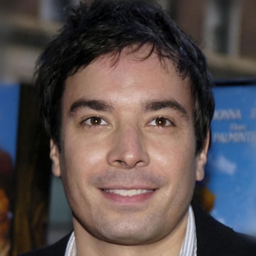

In [ ]:
import numpy as np
import jax.numpy as jnp
from PIL import Image

img = Image.open("./celeb1.jpg")

if img.mode != "RGB":
    img.convert("RGB")

img = jnp.array(img)
print(img.shape)
img = jax.image.resize(img, (256, 256, 3), method="bicubic")
img = Image.fromarray(np.asarray(img).astype(np.uint8))
img.show()

making attention of type 'vanilla' with 512 in_channels
Working with z of shape [ 1 64 64  3] = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels
[[[[-0.09446597  0.28552523 -0.43768492]
   [ 0.85285467  1.7009053   0.19737275]
   [ 0.70258623  1.5387393   0.11318941]
   ...
   [ 1.1413926   0.6681316  -0.11590821]
   [ 1.1784288   0.71372116  0.17237149]
   [-0.15995993 -0.11989737 -0.36780378]]

  [[-1.1670744  -0.32538873 -1.5019675 ]
   [-1.3988471  -0.14540738 -1.4745109 ]
   [-1.5520525  -0.12599345 -1.5969186 ]
   ...
   [-0.6644322  -0.7516551  -0.94014007]
   [-0.6952548  -0.7788906  -0.79810494]
   [-0.41522813 -0.18459383 -0.57719535]]

  [[-1.6806018  -0.6083361  -1.4318781 ]
   [-2.1097856  -0.7694942  -1.4573433 ]
   [-1.8613569  -0.21120161 -1.198121  ]
   ...
   [-1.0618492  -0.70078754 -1.3836123 ]
   [-0.8871614  -0.7055353  -1.0607913 ]
   [-0.65292233 -0.30556563 -0.84117544]]

  ...

  [[ 0.22126198  0.8317672  -2.0327022 ]
   [ 0.6284435   

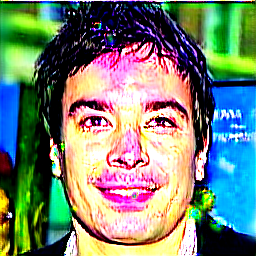

In [ ]:
img = jnp.array(img)
img = img / 255.0
img = normalize_to_minus_one_to_one(img)
img = img[None, ...]

z = flax_ae.apply({"params":params_unflatten}, x=img, train=train, method=flax_ae.encode)
rec_x = flax_ae.apply({"params":params_unflatten}, h=z, train=train, method=flax_ae.decode)

print(rec_x)

# tmp1 = rec_x[..., 0]
# tmp2 = rec_x[..., 1]
# tmp3 = rec_x[..., 2]

# print(tmp1.shape) # G
# print(tmp2.shape) # R 
# print(tmp3.shape) # B

rec_x = jnp.clip(rec_x, -1, 1)
rec_x = rec_x[0]
rec_x = (rec_x + 1) / 2
rec_x = rec_x * 255

rec_x = np.asarray(rec_x)

print(rec_x.shape)

rec_x = Image.fromarray(np.asarray(rec_x).astype(np.uint8))
if rec_x.mode != "RGB":
    rec_x.convert("RGB")
rec_x.show()

# def grey_scale(grey_scale):
#     grey_scale = jnp.clip(grey_scale, -1, 1)
#     grey_scale = grey_scale[0]
#     grey_scale = (grey_scale + 1) / 2
#     grey_scale = grey_scale * 255

#     grey_scale = np.asarray(grey_scale)

#     print(grey_scale.shape)

#     grey_scale = Image.fromarray(np.asarray(grey_scale).astype(np.uint8), "L")
#     grey_scale.show()

# grey_scale(tmp3)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


VQModel(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): LoRACompatibleConv(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-0

In [ ]:
vqvae_dict = vqvae.__dict__

for key in vqvae.state_dict().keys():
    print(key)

encoder.conv_in.weight
encoder.conv_in.bias
encoder.down_blocks.0.resnets.0.norm1.weight
encoder.down_blocks.0.resnets.0.norm1.bias
encoder.down_blocks.0.resnets.0.conv1.weight
encoder.down_blocks.0.resnets.0.conv1.bias
encoder.down_blocks.0.resnets.0.norm2.weight
encoder.down_blocks.0.resnets.0.norm2.bias
encoder.down_blocks.0.resnets.0.conv2.weight
encoder.down_blocks.0.resnets.0.conv2.bias
encoder.down_blocks.0.resnets.1.norm1.weight
encoder.down_blocks.0.resnets.1.norm1.bias
encoder.down_blocks.0.resnets.1.conv1.weight
encoder.down_blocks.0.resnets.1.conv1.bias
encoder.down_blocks.0.resnets.1.norm2.weight
encoder.down_blocks.0.resnets.1.norm2.bias
encoder.down_blocks.0.resnets.1.conv2.weight
encoder.down_blocks.0.resnets.1.conv2.bias
encoder.down_blocks.0.downsamplers.0.conv.weight
encoder.down_blocks.0.downsamplers.0.conv.bias
encoder.down_blocks.1.resnets.0.norm1.weight
encoder.down_blocks.1.resnets.0.norm1.bias
encoder.down_blocks.1.resnets.0.conv1.weight
encoder.down_blocks.1.r

In [ ]:
net["state_dict"]["encoder.conv_in.weight"]

tensor([[[[ 0.0010, -0.0650, -0.0073],
          [-0.0229,  0.2065, -0.1235],
          [-0.0341,  0.1952,  0.0673]],

         [[-0.1207,  0.0701, -0.1350],
          [ 0.1205,  0.0293,  0.0014],
          [-0.0847, -0.1001, -0.0438]],

         [[-0.0346, -0.1232,  0.0391],
          [-0.1530, -0.1006, -0.1345],
          [ 0.0088, -0.2056,  0.1464]]],


        [[[ 0.1533,  0.1791, -0.0650],
          [ 0.0110, -0.0011, -0.0750],
          [ 0.0681,  0.0692, -0.1440]],

         [[-0.0178, -0.1712,  0.0763],
          [ 0.1156,  0.0053, -0.1904],
          [-0.0687,  0.1415, -0.0862]],

         [[ 0.0347, -0.1345,  0.0023],
          [-0.1016, -0.1477, -0.0796],
          [-0.0452,  0.2126,  0.2078]]],


        [[[ 0.0812,  0.1012,  0.0739],
          [-0.1056,  0.0380, -0.0316],
          [-0.1715, -0.0673,  0.0750]],

         [[-0.0751, -0.0492,  0.0299],
          [ 0.0061, -0.2433, -0.1701],
          [ 0.0190,  0.0677, -0.1157]],

         [[ 0.1058,  0.0399,  0.1553],
     

In [ ]:

img = Image.open("./celeb1.jpg")

if img.mode != "RGB":
    img.convert("RGB")


torch.Size([1, 3, 1024, 1024])
tensor([[[[-0.4001, -0.9789,  1.2635],
          [ 0.0408, -1.1214,  1.5234],
          [-0.3909, -0.7446,  1.6234],
          ...,
          [-0.1149, -0.8246,  0.7682],
          [-0.0922, -0.3526,  1.0884],
          [-0.3744, -1.0595,  1.2754]],

         [[ 0.9505, -0.8820,  1.1566],
          [ 1.0095, -0.2557,  1.3233],
          [ 1.3067, -0.6140,  1.3399],
          ...,
          [ 1.0650, -0.3165,  1.1014],
          [ 1.1432, -0.0448,  0.5835],
          [ 1.2903, -0.5492,  1.0198]],

         [[ 0.2544, -0.2329,  0.9971],
          [ 1.1621, -0.1579,  1.1517],
          [ 0.5719, -0.0502,  1.1347],
          ...,
          [ 0.5330, -0.4318,  0.7919],
          [ 0.6540,  0.2410,  0.7701],
          [ 0.9133, -0.3302,  0.9904]],

         ...,

         [[ 1.0481, -1.0517,  0.0891],
          [ 0.7548,  0.4737,  1.3032],
          [ 0.7324,  0.1511, -0.4986],
          ...,
          [ 0.7030, -1.1524,  1.5130],
          [ 0.3457, -0.8139,  

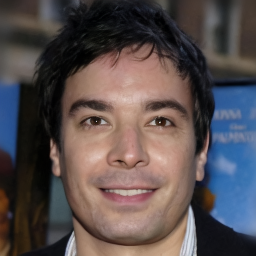

In [ ]:

img = torch.tensor(np.array(img))

img = torch.permute(img, (2, 0, 1))
img = img[None, ...]
print(img.shape)
img = torch.nn.functional.interpolate(img, size=256, mode="bilinear", align_corners=False)

img = img / 255.0
img = normalize_to_minus_one_to_one(img)


z = vqvae.encode(img)
print(torch.permute(z.latents, (0, 2, 3, 1)))
rec_x = vqvae.decode(z.latents)
print(rec_x)
rec_x = rec_x.sample
rec_x = torch.permute(rec_x, (0, 2, 3, 1))



# tmp1 = rec_x[..., 0]
# tmp2 = rec_x[..., 1]
# tmp3 = rec_x[..., 2]

# print(tmp1.shape) # G
# print(tmp2.shape) # R 
# print(tmp3.shape) # B

rec_x = torch.clamp(rec_x, -1, 1)
rec_x = rec_x[0]
rec_x = (rec_x + 1) / 2
rec_x = rec_x * 255

rec_x = rec_x.detach().numpy()

print(rec_x.shape)

rec_x = Image.fromarray(np.asarray(rec_x).astype(np.uint8))
if rec_x.mode != "RGB":
    rec_x.convert("RGB")
rec_x.show()